# Supervised learning
Unsupervised - the answer is unknown, the algorithm tries to determine it <br>
Supervised - the answer is known and used to train an algorithm

Supervised learning is a machine learning approach that’s defined by its use of labeled datasets. These datasets are designed to train or “supervise” algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure its accuracy and learn over time.<br>

There are 2 categories;<br>
**Classification** problems use an algorithm to accurately assign test data into specific categories, such as separating apples from oranges. Or, in the real world, supervised learning algorithms can be used to classify spam in a separate folder from your inbox. Linear classifiers, support vector machines, decision trees and random forest are all common types of classification algorithms.<br>
**Regression** is another type of supervised learning method that uses an algorithm to understand the relationship between dependent and independent variables. Regression models are helpful for predicting numerical values based on different data points, such as sales revenue projections for a given business. Some popular regression algorithms are linear regression, logistic regression and polynomial regression.<br>

<a href="https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning">*source</a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Train and Test sets
Supervised learning requires that your data be split into 2 parts (3 later when we get to cross validaton and hyperparameter tuning)<br>

A train set - generaly 80-90% of the data, used to train a model<br>
A test set  - the remainder of the data, used to validate that the model works

### A balanced Dataset
These are the easiest to use, but are infrequent

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

mapper={v:i for v,i in enumerate(iris.target_names)}
def fun(x):
    return mapper[x]
vfunc=np.vectorize(fun)
df['target']=vfunc(iris.target)
df.head()
len(df)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

150

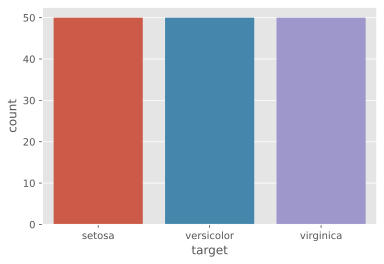

In [4]:
ax=sns.countplot(x="target", data=df)

### An unbalanced Dataset
Harder to use but very common<br>
Examples include cancer diagnosis or fraud detection.  But there are many others<br>

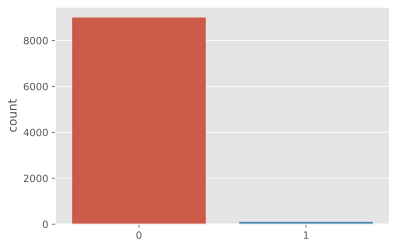

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[9000,100], centers=None, cluster_std=[10.0, 2],random_state=22,n_features=2)
ax=sns.countplot(x=y)

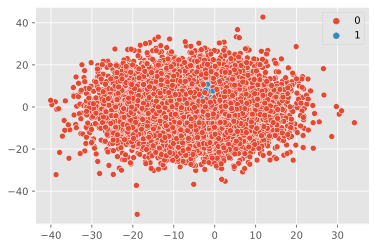

In [6]:
ax=sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

### Use SMOTE to generate synthetic examples from the minority class

In [42]:
# !conda install -c conda-forge imbalanced-learn -y

Solving environment: done

## Package Plan ##

  environment location: /home/keith/anaconda3/envs/data301

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.9.0     |     pyhd8ed1ab_0         115 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         115 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.9.0-pyhd8ed1ab_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.10.26~ --> conda-forge::ca-certificates-2021.10.8-ha878542_0
  certifi            pkgs/main::certifi-2021.10.8-py39h06a~ --> conda-forge::certifi-2021.10.8-py39hf3d152e_1
  conda              pkgs/main::conda-4.11.0-py39h06a4308_0 --> cond

In [10]:
dir(imblearn)

['FunctionSampler',
 'LazyLoader',
 '__IMBLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'combine',
 'ensemble',
 'exceptions',
 'importlib',
 'keras',
 'metrics',
 'over_sampling',
 'pipeline',
 'show_versions',
 'sys',
 'tensorflow',
 'types',
 'under_sampling',
 'utils']

In [9]:
import imblearn
oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X, y)

ax=sns.countplot(x=y_new)

AttributeError: module 'imblearn' has no attribute 'SMOTE'

In [49]:
ax=sns.scatterplot(x=X_new[:,0], y=X_new[:,1], hue=y_new)

## Prefer Stratified splits, always
Eliminates the risk of the test set having a significantly different class distribution than the training set

In [65]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[9000,100], centers=None, cluster_std=[10.0, 2],random_state=22,n_features=2)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,stratify=y,random_state=42)

print(f'Percentage of minority class in test={((y_test==1).sum()/len(y_test))*100:.3f}')
print(f'Percentage of minority class in train={((y_train==1).sum()/len(y_train))*100:.3f}')

Percentage of minority class in test=1.099
Percentage of minority class in train=1.099
